In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

In [2]:
df = pd.read_csv('../Data/Chapter_1_cleaned_data.csv')

In [3]:
features_response = df.columns.tolist()

In [4]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [5]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [7]:
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
                 df['default payment next month'].values,
                 test_size=0.2, random_state=24)

# Exercise 20: Finding Optimal Hyperparameters for a Decision Tree

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
X_train.shape

(21331, 17)

In [11]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}
# params = {'max_depth':list(range(1,13))}

In [12]:
dt = tree.DecisionTreeClassifier()

In [13]:
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, refit=True, cv=4, verbose=1,
                  pre_dispatch=None, error_score=np.nan,
                  return_train_score=True)

In [14]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    3.1s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [15]:
# cv.cv_results_

In [16]:
cv_results_df = pd.DataFrame(cv.cv_results_)

In [17]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.035390,0.024875,0.002698,0.000354,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.038176,0.004756,0.002802,0.000359,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.063123,0.000660,0.002561,0.000030,4,{'max_depth': 4},0.732720,0.741078,0.746946,0.743731,0.741119,0.005276,2,0.756882,0.752421,0.749368,0.753055,0.752932,0.002673
3,0.091004,0.000385,0.002672,0.000052,6,{'max_depth': 6},0.744607,0.745998,0.752069,0.741588,0.746065,0.003815,1,0.782202,0.780125,0.775228,0.774776,0.778083,0.003171
4,0.129214,0.007153,0.002921,0.000095,8,{'max_depth': 8},0.729148,0.732385,0.751008,0.731360,0.735975,0.008758,3,0.811837,0.808245,0.803345,0.802413,0.806460,0.003814
5,0.156508,0.007244,0.003228,0.000620,10,{'max_depth': 10},0.710101,0.705538,0.717219,0.714746,0.711901,0.004475,4,0.848814,0.854118,0.841185,0.836300,0.845104,0.006854
6,0.190398,0.015790,0.003117,0.000312,12,{'max_depth': 12},0.675556,0.661626,0.678645,0.685402,0.675307,0.008664,6,0.888025,0.903544,0.885301,0.875710,0.888145,0.009998


In [18]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

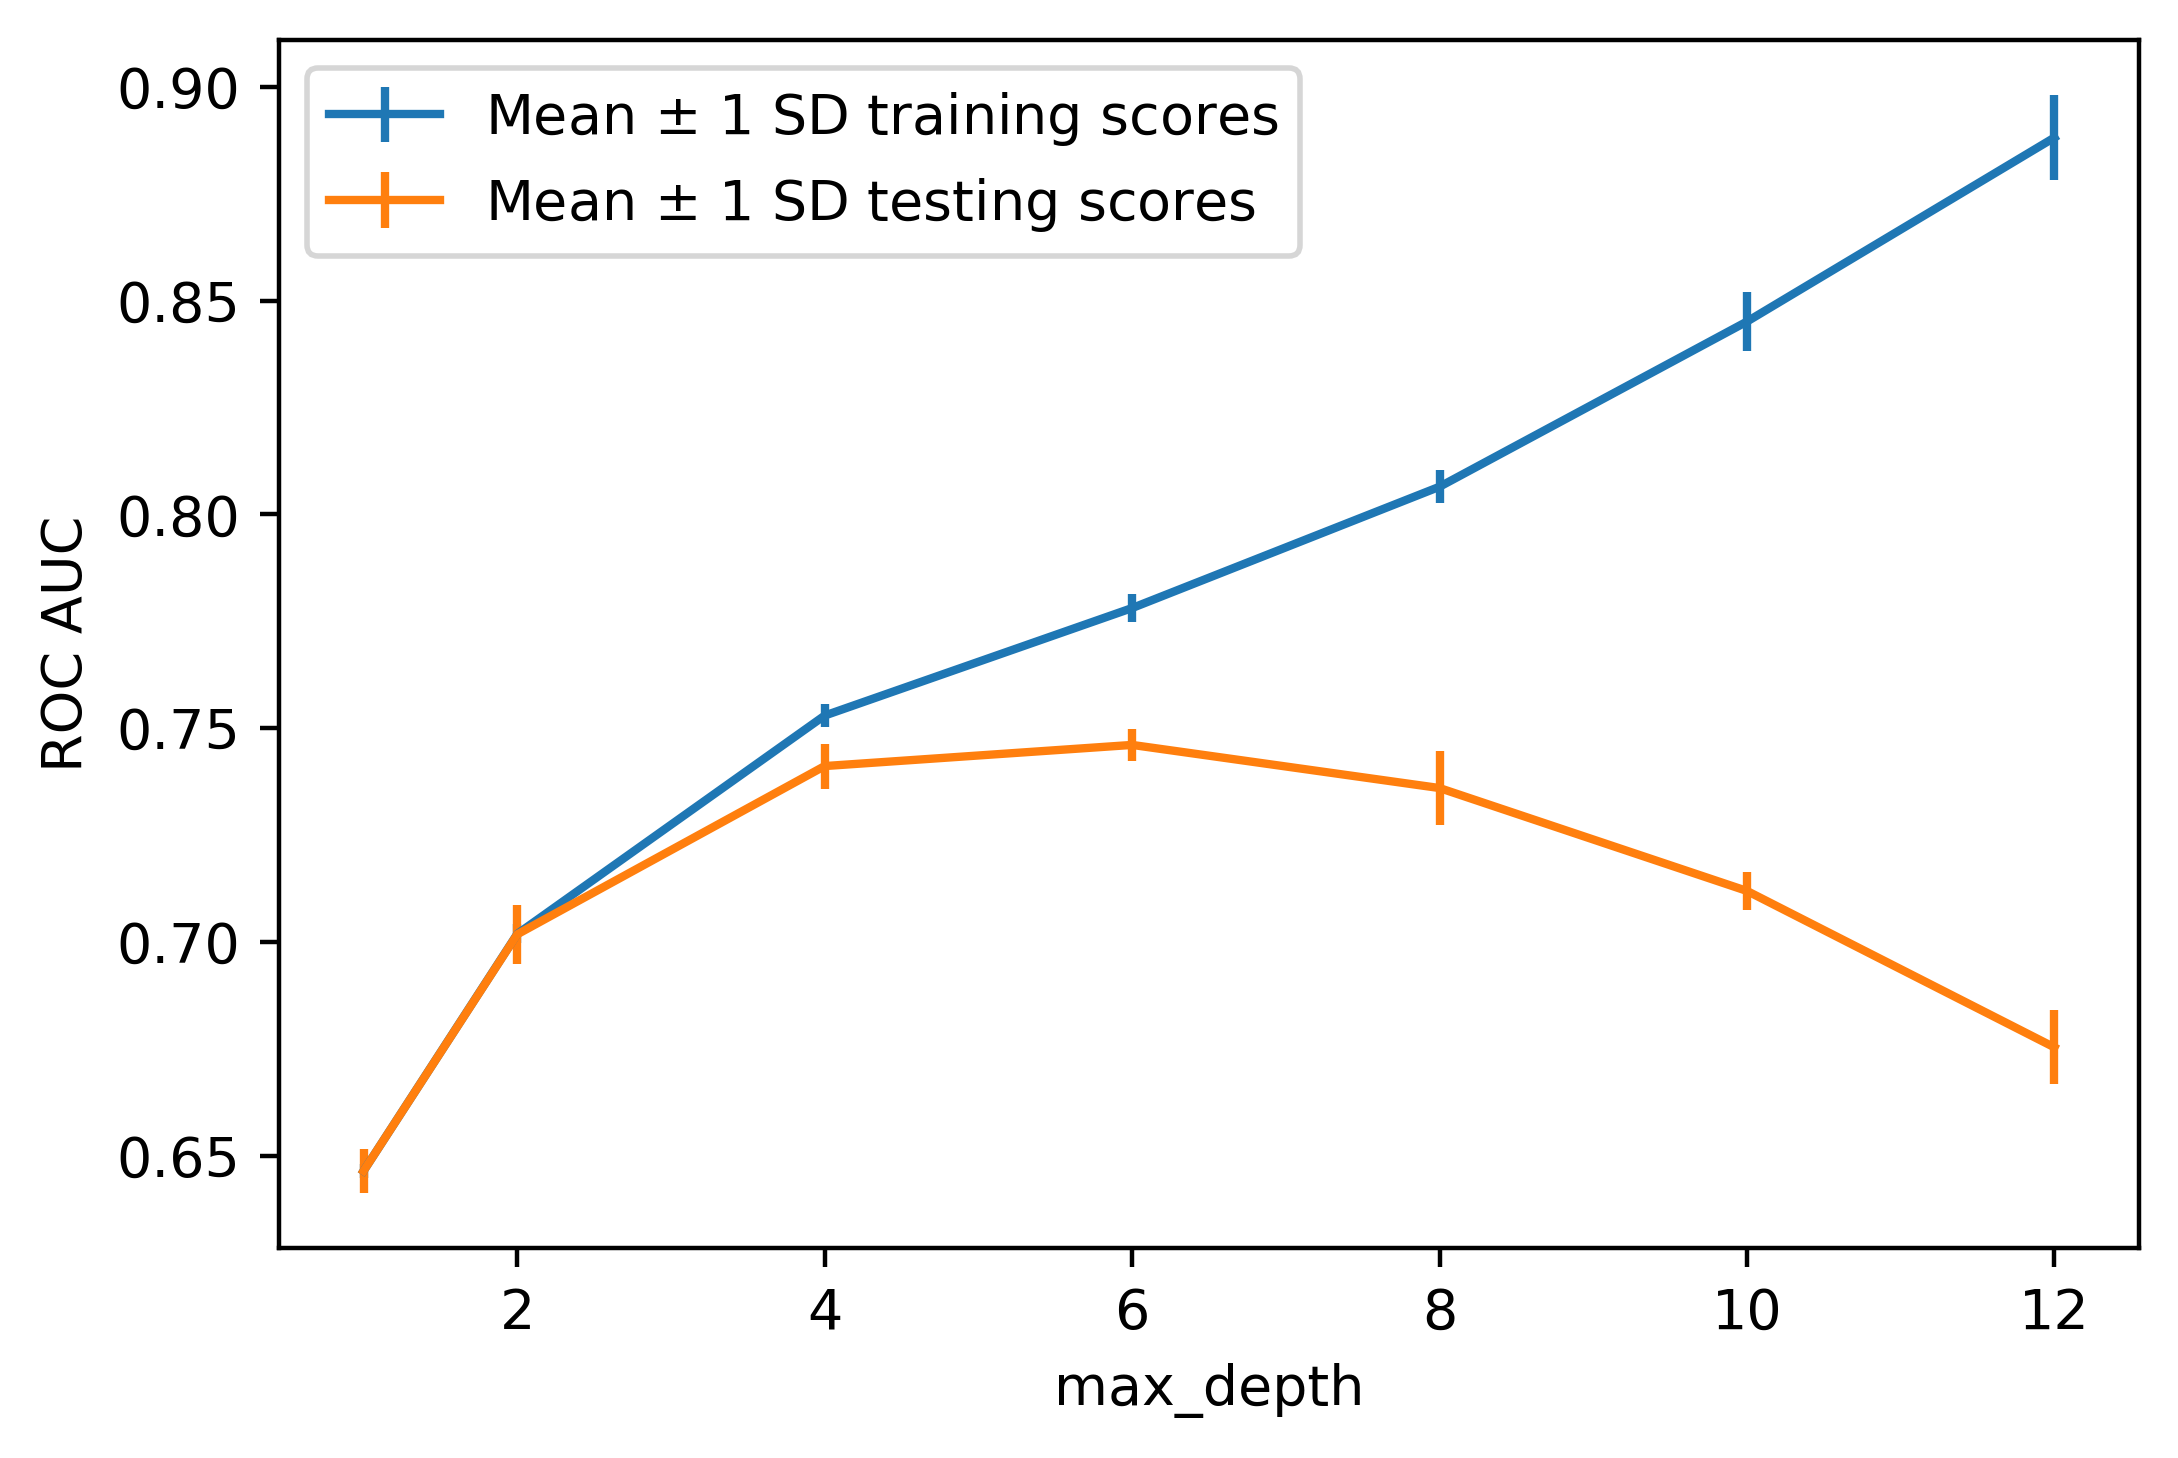

In [19]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [20]:
cv_results_df.max()

mean_fit_time         0.190398
std_fit_time          0.024875
mean_score_time       0.003228
std_score_time         0.00062
param_max_depth             12
split0_test_score     0.744607
split1_test_score     0.745998
split2_test_score     0.752069
split3_test_score     0.743731
mean_test_score       0.746065
std_test_score        0.008758
rank_test_score              7
split0_train_score    0.888025
split1_train_score    0.903544
split2_train_score    0.885301
split3_train_score     0.87571
mean_train_score      0.888145
std_train_score       0.009998
dtype: object